[Nhóm 2 - Github link](https://github.com/kolee1902/APP_Changing_Image_Background_UNET)

Thành viên NHÓM 2:

- 21127129 - Lê Nguyễn Kiều Oanh  
- 21127104 - Đoàn Ngọc Mai  


# **CSC14116 - Changing image background using UNET**

## **Framework Project**

---

### 📌 1. Giới thiệu

Trong lĩnh vực xử lý ảnh, đặc biệt là bài toán **phân đoạn ảnh (image segmentation)**, việc tách tiền cảnh (foreground) khỏi hậu cảnh (background) là một bước quan trọng. Kiến trúc **U-Net**, được giới thiệu lần đầu trong lĩnh vực ảnh sinh học, đã chứng minh hiệu quả vượt trội cho các bài toán segmentation mà không cần một lượng lớn dữ liệu huấn luyện.

---

### 🧠 2. Kiến trúc U-Net

Kiến trúc U-Net gồm ba thành phần chính:

* **Encoder (Contracting Path)**: Trích xuất đặc trưng với các lớp tích chập (convolution) và giảm kích thước (max pooling).
* **Decoder (Expanding Path)**: Tăng kích thước ảnh đầu ra bằng các lớp up-convolution (deconvolution) để tái tạo lại phân vùng ảnh.
* **Skip Connections**: Giúp giữ lại thông tin chi tiết (ví dụ: biên ảnh) bằng cách kết nối trực tiếp encoder với decoder tại các tầng tương ứng.
* **1x1 Convolution cuối cùng**: Dự đoán phân lớp trên từng pixel.

```
Encoder (↓):        Input -> Conv -> ReLU -> Conv -> ReLU -> MaxPool
Decoder (↑):        UpConv -> Concatenate (skip) -> Conv -> ReLU -> Conv -> ReLU
```

#### 🔧 Cấu trúc tổng quát


![Ảnh minh hoạ](https://media.geeksforgeeks.org/wp-content/uploads/20220614121231/Group14.jpg)


---

#### 🧱 Kiến trúc chi tiết

| Thành phần     | Chi tiết                                          |
| -------------- | ------------------------------------------------- |
| Conv layers    | 3x3 padding + ReLU                                |
| MaxPooling     | 2x2                                               |
| Up-convolution | 2x2                                               |
| Output layer   | 1x1 convolution để dự đoán phân lớp tại mỗi pixel |

U-Net sử dụng **data augmentation mạnh mẽ** (flip, rotation, shift, elastic deformation) để tạo ra nhiều mẫu từ ảnh gốc – điều này giúp giải quyết vấn đề thiếu dữ liệu.

---

### 🛠️ 3. Ứng dụng U-Net cho Project Change Background

#### 🎯 Mục tiêu

Sử dụng U-Net để **tách lớp foreground (người, vật thể chính)** khỏi ảnh, sau đó **thay thế background** bằng một ảnh mới.

---

#### 🔧 Framework tổng quan

---

#### 🚶‍♂️ Bước 1: Chuẩn bị Dữ liệu

* **Input**: Hình ảnh RGB chứa người hoặc vật thể chính cần giữ lại.
* **Resize** ảnh về kích thước cố định (thường là `256x256`).
* **Normalize** pixel trong khoảng `[0, 1]`.

---

#### 🧠 Bước 2: Dự đoán Mask bằng U-Net

* Mô hình U-Net được **load từ trọng số đã huấn luyện** hoặc **huấn luyện lại** từ đầu (nếu dữ liệu đủ).
* Output là một **binary mask**, nơi `1` tương ứng với foreground (người), `0` là background.

---

#### 🧪 Bước 3: Hậu xử lý Mask

* **Làm mịn mask** bằng các kỹ thuật như:

  * Morphological operation (erosion/dilation)
  * Gaussian blur
  * Thresholding

> Mục đích: Tăng độ chính xác biên và giảm nhiễu.

---

#### ✂️ Bước 4: Tách foreground

Sử dụng mask để giữ lại vùng foreground:

```python
result = input_image * mask[..., np.newaxis]
```

---

#### 🌄 Bước 5: Chèn nền mới

* Load ảnh nền mới (có cùng kích thước).
* Áp dụng công thức:

```python
output = result + background * (1 - mask[..., np.newaxis])
```

* Kết quả là một ảnh mới với foreground giữ nguyên và background đã thay đổi.

---

### 🧪 4. Đánh giá

Nhóm chạy cùng một mô hình với dữ liệu đầu vào giống nhau cho cả phiên bản tuần tự và phiên bản song song (dùng multiprocessing). Sau đó, nhóm so sánh độ chính xác (accuracy) của hai mô hình.

Ngoài ra, nhóm có thể sử dụng các tiêu chí đánh giá phổ biến:

| Chỉ số             | Giải thích                                          |
| ------------------ | --------------------------------------------------- |
| **IoU**            | Mức độ chồng lấp giữa mask dự đoán và ground truth  |
| **Dice Score**     | Tỷ lệ chính xác giữa vùng foreground được phân đoạn |
| **Pixel Accuracy** | Tỷ lệ pixel được phân loại đúng                     |

### 📌 5. Vì sao lại lựa chọn U-Net?

U-Net là một mô hình mạnh mẽ và đơn giản cho bài toán segmentation. Khi áp dụng vào project thay background ảnh:

* Mô hình có thể tách chính xác foreground, giúp thay background mượt mà.
* Có thể kết hợp thêm các kỹ thuật xử lý ảnh cổ điển để cải thiện đầu ra.
* U-Net pretrained có thể dùng với các tập dữ liệu segmentation thông dụng như COCO, Pascal VOC, hoặc tự thu thập nếu phù hợp.

---

### 📚 Tham khảo

* Ronneberger et al., *U-Net: Convolutional Networks for Biomedical Image Segmentation*, [arXiv:1505.04597](https://arxiv.org/pdf/1505.04597v1)
* [https://towardsdatascience.com/understanding-u-net-61276b10f360/](https://towardsdatascience.com/understanding-u-net-61276b10f360/)
* [https://github.com/milesial/Pytorch-UNet](https://github.com/milesial/Pytorch-UNet)

---

## **Hướng tiếp cận**
Dựa trên 2 bước chính:
1. Cài đặt quá trình feedforward với bộ trọng số đã huấn luyện của mô hình U-Net để giải quyết bài toán human segmentation.

   Các **tầng layer chính**: **`Conv2d`, `BatchNormalization`, `Activation('relu')`, `MaxPool2D`, `Conv2dTranspose`, `Activation('sigmoid')`**

   Ngoài ra còn có hàm Concatenation.

2. Thay thế các pixel thuộc lớp background với hình ảnh người dùng muốn thay thế.

**Tuần tự:** viết code cho các layer sử dụng numpy.

**Song song:** sử dụng numba để tối ưu hóa code tuần tự.     

![zoom5](https://user-images.githubusercontent.com/47071155/174651030-3d2a6216-8f11-4ee7-953e-9dae594b5348.jpg)

![image](https://drive.google.com/uc?id=12PtDDQ8LEpG1EyGTbuon3d7a0bnkH1Ze)

_Ảnh kết quả khi xác định pixel của người dùng mô hình U-Net_

*Nguồn ảnh*: Google image


## Giới thiệu mô hình tham chiếu dùng để đánh giá độ chính xác của Project

Trong project này, nhóm sử dụng lại mô hình **U-Net** đã được huấn luyện sẵn từ một nguồn đáng tin cậy nhằm làm **mốc tham chiếu** để **đánh giá độ chính xác** cho mô hình nhóm xây dựng. Cụ thể, mô hình được lấy từ [notebook của Kiranshahi trên Kaggle](https://www.kaggle.com/code/kiranshahi/unet-implementation/notebook), nơi cung cấp một implementation rõ ràng và chuẩn mực của U-Net cho bài toán phân đoạn người.

Mô hình U-Net này sử dụng kiến trúc **encoder–decoder đối xứng** với các **skip connection** (nối tắt) để giữ lại các đặc trưng chi tiết trong quá trình giải mã, và đã được huấn luyện với tập dữ liệu ảnh người và mặt nạ tương ứng. Mô hình này được lưu dưới dạng file **`unet.h5`**, bao gồm toàn bộ kiến trúc và tham số đã học.

Trong project của nhóm, chúng tôi **tải lại mô hình U-Net này và sử dụng nó làm baseline** để:

* So sánh độ chính xác phân đoạn giữa mô hình gốc và mô hình do nhóm tự xây dựng,
* Và **tái sử dụng các trọng số đã huấn luyện sẵn** nhằm giảm thời gian huấn luyện từ đầu.

Điểm quan trọng là: **mục tiêu chính của nhóm không phải là cải thiện độ chính xác**, mà là **thiết kế lại pipeline và cải tiến hiệu suất thực thi** (chẳng hạn như song song hóa các lớp mạng hoặc tăng tốc inference). Do đó, việc sử dụng mô hình có sẵn giúp nhóm tập trung vào cải tiến hiệu suất mà vẫn đảm bảo kết quả đầu ra có thể đánh giá được một cách khách quan.


Dưới đây là phiên bản **ngắn gọn, rõ ràng và phù hợp để trình bày tổng quan mô hình tham chiếu** U-Net trong phần mở đầu báo cáo hoặc thuyết trình:


### 1. Kiến trúc mô hình

Mô hình U-Net có cấu trúc đối xứng dạng chữ U với:

* **Encoder**: giảm kích thước và trích xuất đặc trưng với Conv2D + MaxPooling.
* **Decoder**: khôi phục lại kích thước ảnh với Conv2DTranspose + skip connections.
* **Output**: lớp Conv2D (1×1) với `sigmoid`, trả về mặt nạ nhị phân.

### 2. Dữ liệu huấn luyện

Sử dụng bộ dữ liệu từ Kaggle, gồm ảnh RGB và mặt nạ nhị phân (grayscale), tất cả được resize về kích thước **256×256**, chuẩn hóa về \[0, 1], và chia thành **80% train – 20% validation**.

[Dataset Link](https://www.kaggle.com/datasets/nikhilroxtomar/person-segmentation)
Bộ dữ liệu gồm ảnh chứa người và binary mask. Cấu trúc thư mục:

*   images
*   masks
*   segmentation: chứa các file csv để phân chia tập train, validation

### 3. Thông số huấn luyện

* **Batch size**: 8
* **Epochs**: 10
* **Learning rate**: 1e-4
* **Optimizer**: Adam
* **Loss**: Binary Crossentropy
* **Đánh giá**: Mean IoU, Recall, Precision

### 4. Các hàm chính

* `conv_block`: Tạo khối Conv2D + BatchNorm + ReLU
* `encoder_block` / `decoder_block`: Tạo encoder/decoder với pooling hoặc transpose
* `build_unet`: Kết hợp các block để tạo kiến trúc U-Net
* `load_data`, `read_image`, `read_mask`: Xử lý dữ liệu đầu vào
* `tf_dataset`: Tạo pipeline huấn luyện với `tf.data.Dataset`

Tất cả các thành phần được thiết kế theo hướng module hóa, dễ quản lý và mở rộng.




## Phiên bản 1: Cài đặt tuần tự

Thuật toán được triển khai bằng **Python thuần**, sử dụng vòng lặp `for` và câu lệnh `if`.

Nhóm sẽ so sánh **hai phiên bản**:

* Không dùng `@jit`: chạy chậm do không được tối ưu.
* Có dùng `@jit` (từ thư viện `numba`): giúp **tăng tốc rõ rệt** nhờ biên dịch mã máy tại thời điểm chạy.

So sánh này cho thấy lợi ích của tối ưu hóa bằng JIT với các thuật toán tuần tự.



### Thiết kế

**Ý tưởng chính:**
* Tính kích thước và khởi tạo ma trận output.
* Sử dụng 3 vòng lặp tương ứng với depth, width, height để duyệt và tính kết quả cho từng phần tử của ma trận output.



**Activation("relu")**

Công thức: $f(x) = max(0,x)$ \
* Kích thước ma trận output = input
* Với từng phần tử output: giá trị = 0 nếu x < 0

**MaxPool2D**

MaxPool2D là layer dùng để giảm kích thước của đặc trưng.

*   Kích thước ma trận output: $O = \frac{I - poolsize}{stride}+1$ \
 $O$ : output's width/ height \
 $I$ : input's width/ height

* Với từng phần tử output: sử dụng 2 dòng for duyệt khu vực filter để tìm được giá trị maximum.

![image.png](https://miro.medium.com/max/1400/1*8yfDolcDtTR7lO88J9crag.png)

> *Nguồn ảnh*: https://medium.com/@PAdhokshaja/simple-cnn-using-numpy-part-iii-relu-max-pooling-softmax-c03a3377eaf2

**Convolution 2D**

Convolution (lớp tích chập) là lớp trích xuất các đặc tính từ hình ảnh. Bằng cách trượt dần bộ lọc theo chiều ngang và dọc trên ảnh, chúng ta sẽ thu được một feature map chứa các đặc trưng được trích xuất từ trên hình ảnh đầu vào. \
*   Kích thước ma trận output: $O = \frac{I - K + 2*padding}{stride}+1$ \
 $O$ : output's width/ height \
 $I$ : input's width/ height \
 $K$ : kernel's width/ height
*   Với từng phần tử output: tính kết quả của phép tích chập ứng với phần tử hiện tại.

<img src="https://i.stack.imgur.com/BZHGo.png" alt="drawing" width="512"/>

> *Nguồn ảnh*: https://stackoverflow.com/questions/43306323/keras-conv2d-and-input-channels

**Transpose Convolution 2D**

> *Tham khảo*: Dive into deep learning, Transposed Convolution, https://d2l.ai/chapter_computer-vision/transposed-conv.html

Lớp Tranpose Convolution là quá trình ngược lại của lớp Convolution. Convolution: biến đổi từ ảnh sang đặc trưng. Tranpose Convolution: biến đổi từ đặc trưng sang các pixel ảnh

Ngoài ra, có thể gia tăng kích thước đặc trưng một cách đơn giản thông qua Upsampling nhưng có thể gây mất mát thông tin.
*   Kích thước ma trận output: $O = (I - 1)*stride + K + padding$ \
*   Với từng phần tử output: tính phép tích chập đảo cho từng phần tử.

![image.png](https://drive.google.com/uc?id=1wwcnrm_j4Ua_Bs40gZCq537CgsiN4kLm)

> *Tham khảo*: Dive into deep learning, Transposed Convolution, https://d2l.ai/chapter_computer-vision/transposed-conv.html

**Batch Normalization**

Lớp Batch Normalization dùng để chuẩn hóa các giá trị của đặc trưng, giúp ổn định và tăng tốc huấn luyện deep learning và làm cho dữ liệu đầu vào của mỗi lớp có phân phối chuẩn (mean ≈ 0, var ≈ 1). Nhóm thao khảo công thức tầng Batch Normalization của [thư viện keras](https://keras.io/api/layers/normalization_layers/batch_normalization/)

* Kích thước ma trận output = input
* Với từng phần tử output: chuẩn hóa giá trị dựa trên công thức dưới đây.

Công thức:

$$ \frac{\gamma * (x - moving\_mean)}{\sqrt{moving\_var + \epsilon}} + \beta $$

*Các hệ số được cập nhật trong quá trình học*:
* $\gamma$ : hệ số scaling.
* $\beta$ : hệ số offset (xê dịch).
* $\epsilon$ : hằng số nhỏ để đảm bảo chia với số không âm.
* $𝑚𝑜𝑣𝑖𝑛𝑔\_𝑚𝑒𝑎𝑛$ : là tham số mean được học để chuẩn hóa giá trị.
* $𝑚𝑜𝑣𝑖𝑛𝑔\_𝑣𝑎𝑟$ : là tham số variance được học để chuẩn hóa giá trị.





**Concatenation**

Lớp Concatenation dùng để tạo skip-connection giúp cho việc truyền gradient về các lớp đầu tốt hơn. Hàm này thường được dùng trong kiến trúc như U-Net, nơi các đặc trưng (feature maps) từ nhánh xuống (skip_features) được nối với các đặc trưng từ nhánh lên (x) theo chiều kênh để giữ lại thông tin không gian đã học.

* Kích thước ma trận output: $(1, InputWidth, InputHeight, InputDepth*2)$
* Với từng phần tử: gán thành giá trị của feature map hoặc skip-features dựa vào chỉ số hiện tại của depth



### Cài đặt

#### Thêm thư viện và liên kết drive

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
%cd /content/drive/MyDrive/CSC14116-LTSSUD

/content/drive/MyDrive/CSC14116-LTSSUD


In [65]:
import numpy as np
import cv2
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

import math
from time import time
from numba import jit, prange, config, cuda, float32
import pandas as pd

import os
import keras
from PIL import Image

In [66]:
def read_image(path):
    original_img = cv2.imread(path, cv2.IMREAD_COLOR)
    h, w, d = original_img.shape
    x = cv2.resize(original_img, (256, 256))
    x = x/255.0
    x = x.astype(np.float32)
    # (256, 256, 3)
    return x, w, h, original_img

In [67]:
# Read input and build model
x, x_w, x_h, original_img = read_image("./Images/zoom5.jpg")
x = np.expand_dims(x, axis=0)

Chạy thử mô hình có sẵn và lưu lại output cuối cùng

In [68]:
# Load model
model = keras.models.load_model("./Model_27/unet.h5")

# Load ảnh gốc
img_path = "./Images/zoom5.jpg"
img_orig = cv2.imread(img_path)
if img_orig is None:
    raise FileNotFoundError(f"Không tìm thấy ảnh tại {img_path}")

# Lưu lại kích thước gốc
original_size = (img_orig.shape[1], img_orig.shape[0])  # (width, height)

# Resize ảnh về kích thước input của model (giả sử 256x256)
input_size = (256, 256)
img_resized = cv2.resize(img_orig, input_size)
img_input = img_resized.astype("float32") / 255.0
img_input = np.expand_dims(img_input, axis=0)  # shape: (1, 256, 256, 3)

# Dự đoán mask
pred_mask = model.predict(img_input)[0]  # shape: (256, 256, 1)
pred_mask = (pred_mask > 0.5).astype(np.uint8)  # ngưỡng nhị phân hóa
pred_mask = cv2.resize(pred_mask, original_size)  # resize mask về kích thước gốc

# Áp mask lên ảnh gốc để giữ lại người
foreground = img_orig.copy()
foreground[pred_mask == 0] = 0  # đặt background thành trắng

# Lưu ảnh kết quả
save_path = "./Images/unet.jpg"
cv2.imwrite(save_path, foreground)
print(f"Đã lưu ảnh tách nền tại: {save_path}")

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Đã lưu ảnh tách nền tại: ./Images/unet.jpg


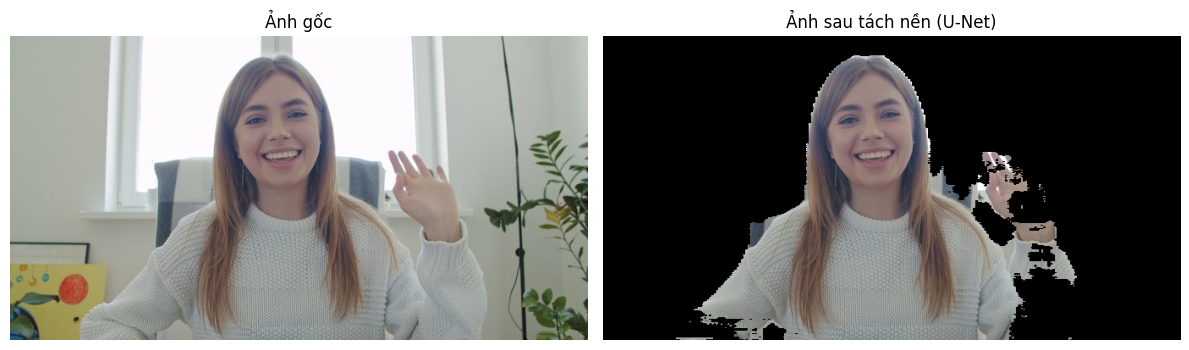

In [69]:
import matplotlib.pyplot as plt

# Đọc lại ảnh gốc và ảnh đã tách nền (dùng matplotlib nên phải chuyển từ BGR -> RGB)
img_orig_rgb = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
img_result = cv2.imread(save_path)
img_result_rgb = cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB)

# Hiển thị hai ảnh cạnh nhau
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_orig_rgb)
plt.title("Ảnh gốc")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_result_rgb)
plt.title("Ảnh sau tách nền (U-Net)")
plt.axis("off")

plt.tight_layout()
plt.show()

Chạy mô hình có sẵn và lưu lại các output của từng layer vào một list.

In [70]:
from tensorflow.keras.models import Model

inp = model.input                                       # input placeholder
outputs = [layer.output for layer in model.layers]      # all layer outputs

# Tạo model trung gian để trả về tất cả output
functors = Model(inputs=inp, outputs=outputs)

# Truyền ảnh input (x) đã chuẩn hóa và có shape (1, 256, 256, 3)
layer_outs = functors.predict(x)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Định nghĩa hàm **`check()`** dùng để đo thời gian thực thi của các tầng

In [71]:
def check(func, *arg):
    start = time()
    result = func(*arg)
    end = time()
    t = end - start
    return result, t

time_compile = np.zeros(7, dtype=float)
time_run = np.zeros(7, dtype=float)
time_unet = np.zeros(7, dtype=float)
time_parallel = np.zeros(7, dtype=float)
func = ['Relu', 'Sigmoid', 'Maxpool2D', 'Conv2D',
        'Conv2D Transpose', 'Batch Norm', 'Concat']

#### Activation("relu")

In [72]:
# @jit(cache=True)
def relu(x):
    for d in range(x.shape[3]):
        for i in range(x.shape[1]):
            for j in range(x.shape[2]):
                if x[0,i,j,d]<0:
                    x[0,i,j,d]=0
    return x

In [73]:
# Check  answer
before = np.array(layer_outs[2])
after = np.array(layer_outs[3])

i = 0
res, t = check(relu, before)
time_compile[i] += t
print("Checking difference:", np.abs(res-after).mean())

Checking difference: 0.0


In [74]:
_, t = check(relu, before)
time_run[i] += t

#### Activation("sigmoid")

In [75]:
# @jit(cache=True)
def sigmoid(x):
    for d in range(x.shape[3]):
        for i in range(x.shape[1]):
            for j in range(x.shape[2]):
                x[0,i,j,d]= 1 / (1 + np.exp(-x[0,i,j,d]))
    return x

In [76]:
before = np.array(layer_outs[2])
after = 1 / (1 + np.exp(-layer_outs[2]))

i += 1
res, t = check(sigmoid, before)
time_compile[i] += t
print("Checking difference:", np.abs(res-after).mean())

Checking difference: 0.0


In [77]:
_, t = check(sigmoid, before)
time_run[i] += t

#### MaxPool2D

In [78]:
# @jit(cache=True)
def maxpool2d(x, pool_size = 2,stride = 2):
    # Input dim (1,256,256,3)
    # Tính toán kích thước đầu ra sau khi pooling
    output_width = output_height = int((x.shape[1]-pool_size)/stride)+1
    # Khởi tạo tensor chứa kết quả pooling, có cùng số kênh với đầu vào.
    pooled = np.zeros((1,output_width,output_height,x.shape[3]))

    # Iterate over all pools
    for d in range(x.shape[3]): # Duyệt qua từng kênh màu (channel), ví dụ R, G, B.
        for i in range(0,x.shape[1], stride):
            for j in range(0, x.shape[2], stride): # Duyệt từng "vùng pooling" trên ảnh theo bước stride.
                # Lấy ra một vùng nhỏ pool_size x pool_size và tính giá trị lớn nhất trong vùng đó
                if i+pool_size <= x.shape[1] and j+pool_size <= x.shape[1]:
                    mat = x[:,i:i+pool_size, j:j+pool_size, d]
                    pooled[:,int(i/stride),int(j/stride),d]=np.max(mat) # Gán vào tensor đầu ra pooled.
                else:
                    raise Exception("Out of index")
    return pooled

In [79]:
# Check  answer
before = np.array(layer_outs[6])
after = np.array(layer_outs[7])

i += 1
res, t = check(maxpool2d, before)
time_compile[i] = t
print("Checking difference:", np.abs(res-after).mean())

Checking difference: 0.0


In [80]:
_, t = check(maxpool2d, before)
time_run[i] = t

#### Conv2D

In [81]:
# @jit(cache=True)
def conv2D(input, wei, bias, padding='valid', stride=1):
    # Lấy kích thước chiều rộng, cao, và số kênh đầu vào
    w_in, h_in, c_in = input.shape[1], input.shape[2], input.shape[3]
    k = wei.shape[1] # kernel size
    pad = k // 2 if (padding == 'same') else 0
    # Tính kích thước đầu ra
    w_out = (w_in + 2 * pad - k)//stride + 1
    h_out = (h_in + 2 * pad - k)//stride + 1
    c_out = bias.shape[0]

    # Tạo ảnh đã padding
    input_pad = np.zeros((1, w_in + 2 * pad, h_in + 2 * pad, c_in)) # Khởi tạo ảnh mới
    input_pad[0, pad:(w_in + pad), pad:(h_in + pad), :] = input # Sao chép ảnh gốc vào giữa.

    res=np.zeros((1, w_out, h_out, c_out)) # Tạo tensor kết quả đầu ra

    # Duyệt từng pixel đầu ra và tính giá trị bằng tích chập
    for x in range(w_out):
        for y in range(h_out):
            for c_o in range(c_out): # Duyệt từng output channel
                total=0.
                for c_i in range(c_in): # Duyệt từng input channel
                    kt=0.
                    for k_x in range(k):
                        for k_y in range(k):
                            pos1 = k_x + x * stride
                            pos2 = k_y + y * stride
                            kt += (wei[k_x, k_y, c_i, c_o]
                                        * input_pad[0, pos1, pos2, c_i])
                    total += kt
                res[0, x, y, c_o] = total + bias[c_o]
    return res

In [82]:
before = np.array(x)
after = np.array(layer_outs[1])
weight = model.layers[1].weights[0].numpy()
bias = model.layers[1].weights[1].numpy()

i += 1
res, t = check(conv2D, before, weight, bias, 'same')
time_compile[i] = t
print("Checking difference:", np.abs(res-after).mean())

Checking difference: 9.197179513057945e-09


In [83]:
_, t= check(conv2D, before, weight, bias, 'same')
time_run[i] = t

#### Conv2D Transpose

In [84]:
# @jit(cache=True)
def conv2Dtranspose(input, wei, bias, padding='none', stride=1):
    w_in, h_in, c_in = input.shape[1], input.shape[2], input.shape[3]
    k = wei.shape[1] # kernel size

    w_out = w_in*stride
    h_out = h_in*stride
    c_out = bias.shape[0]
    res = np.zeros((1, w_out, h_out, c_out))

    for c_o in range(c_out):  # Duyệt từng output channel
        for x in range(w_in):   # Duyệt từng pixel theo chiều rộng input
            for y in range(h_in): # Duyệt theo chiều cao
                ker = np.zeros((k, k)) # Tạo một patch kernel
                # Mỗi vị trí (x, y) của ảnh đầu vào sẽ tạo ra một patch ker để "vẽ" lên ảnh đầu ra
                for c_i in range(c_in):   # Duyệt input channels
                    for k_x in range(k):
                        for k_y in range(k):
                            ker[k_x, k_y] += (wei[k_x, k_y, c_o, c_i]
                                                    * input[0, x, y, c_i])
                # Tính trọng số cho từng phần tử kernel theo giá trị tại (x, y, c_i).
                # Các kênh input được gộp lại cho ra 1 kênh output
                # Gán patch kernel (đã nhân và cộng bias) vào đúng vị trí tương ứng trong ảnh đầu ra.
                res[0, x*stride: x*stride + k,
                    y*stride: y*stride + k, c_o] += ker + bias[c_o]
    return res

In [85]:
before = np.array(layer_outs[34])
after = np.array(layer_outs[35])
weight = model.layers[35].weights[0].numpy()
bias = model.layers[35].weights[1].numpy()

i += 1
res, t = check(conv2Dtranspose, before, weight, bias, "same", 2)
time_compile[i] = t
print("Checking difference:", np.abs(res-after).mean())

Checking difference: 2.549482946781929e-07


In [86]:
_, t= check(conv2Dtranspose, before, weight, bias, "same", 2)
time_run[i] = t

#### Batch Normalization

In [87]:
# @jit(cache=True)
def batchNorm(X, gamma, beta, mov_mean, mov_var):
    eps = 0.001
    Y = X.copy()
    for d in range(X.shape[3]): # duyệt từng channel
        for i in range(X.shape[1]):# duyệt theo chiều cao
            for j in range(X.shape[2]): # duyệt theo chiều rộng
                Y[0,i,j,d] = beta[d] + (gamma[d]*(X[0,i,j,d]-mov_mean[d])
                                            / np.sqrt(mov_var[d]+eps))
    return Y

In [88]:
before = np.array(layer_outs[1])
after = np.array(layer_outs[2])

wei = model.layers[2].weights
gamma = wei[0].numpy()
beta = wei[1].numpy()
moving_mean = wei[2].numpy()
moving_var = wei[3].numpy()

i += 1
res, t = check(batchNorm, before, gamma, beta, moving_mean, moving_var)
time_compile[i] = t
print("Checking difference:", np.abs(res-after).mean())

Checking difference: 3.326273e-08


In [89]:
_, t= check(batchNorm, before, gamma, beta, moving_mean, moving_var)
time_run[i] = t

#### Concatenation

In [90]:
# @jit(cache=True)
def concat(skip_features, x):
    w_in, h_in, c_in = x.shape[1] ,x.shape[2] ,x.shape[3]
    Y = np.zeros((1,w_in, h_in, c_in*2))
    for d in range(Y.shape[3]):
        for i in range(Y.shape[1]):
            for j in range(Y.shape[2]):
              if d<c_in:
                Y[:,i,j,d] = x[:,i,j,d] # kênh đầu từ x
              else:
                Y[:,i,j,d] = skip_features[:,i,j,d-c_in] # kênh sau từ skip
    return Y

In [91]:
before = np.array(layer_outs[59])
after = np.array(layer_outs[60])

i += 1
res, t = check(concat, np.array(layer_outs[6]), before)
time_compile[i] = t
print("Checking difference:", np.abs(res-after).mean())

Checking difference: 0.0


In [92]:
_, t = check(concat, np.array(layer_outs[6]), before)
time_run[i] = t

### Đánh giá

#### Thời gian chạy

**Chưa thêm @jit**

In [93]:
pd.DataFrame(list(zip(func, time_compile, time_run)),
               columns =['Name', 'Compile+Run(s)', 'Run(s)']).sort_values(by=['Run(s)'], ascending=False)

,Name,Compile+Run(s),Run(s)
4,Conv2D Transpose,538.270997,533.928533
3,Conv2D,89.292705,85.792684
5,Batch Norm,8.861994,9.268496
6,Concat,6.290414,7.669121
1,Sigmoid,7.934254,7.045584
2,Maxpool2D,7.531251,5.984954
0,Relu,1.417236,1.016575


In [94]:
print("Tổng thời gian chạy tuần tự (Compile+Run): ", round(time_compile.sum(), 6), '(s)')
print("Tổng thời gian chạy tuần tự (Run): ", round(time_run.sum(), 6), '(s)')

Tổng thời gian chạy tuần tự (Compile+Run):  659.598851 (s)
Tổng thời gian chạy tuần tự (Run):  650.705946 (s)


**Sau khi thêm @jit**

In [ ]:
pd.DataFrame(list(zip(func, time_compile, time_run)),
               columns =['Name', 'Compile+Run(s)', 'Run(s)']).sort_values(by=['Run(s)'], ascending=False)

,Name,Compile+Run(s),Run(s)
4,Conv2D Transpose,2.422712,1.657176
6,Concat,0.830962,0.548923
3,Conv2D,3.034943,0.213219
2,Maxpool2D,0.933205,0.091268
1,Sigmoid,0.228992,0.067676
5,Batch Norm,0.236107,0.047523
0,Relu,0.949203,0.017494


In [62]:
print("Tổng thời gian chạy tuần tự (Compile+Run): ", round(time_compile.sum(), 6), '(s)')
print("Tổng thời gian chạy tuần tự (Run): ", round(time_run.sum(), 6), '(s)')

Tổng thời gian chạy tuần tự (Compile+Run):  4.960746 (s)
Tổng thời gian chạy tuần tự (Run):  2.420333 (s)
